In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadf = pd.read_csv(r"C:\Users\nicho\OneDrive\Desktop\Challenge 5\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv")  
mouse_metadf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(r"C:\Users\nicho\OneDrive\Desktop\Challenge 5\Starter_Code\Pymaceuticals\data\Study_results.csv")

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
merged_study = pd.merge(study_results, mouse_metadf, how="left", on=["Mouse ID", "Mouse ID"])

In [6]:
merged_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
number = merged_study["Mouse ID"].unique()
number_mice = len(number)
number_mice

249

In [8]:
duplicate_mice = merged_study[merged_study.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
clean_study = merged_study[merged_study["Mouse ID"]!="g989"]

In [10]:
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
len(clean_study['Mouse ID'].unique())

248

In [12]:
drug_data = clean_study.groupby("Drug Regimen")

In [13]:
tumor_mean = drug_data["Tumor Volume (mm3)"].mean()

In [14]:
tumor_median = drug_data["Tumor Volume (mm3)"].median()

In [15]:
tumor_variance = drug_data["Tumor Volume (mm3)"].var

In [16]:
standardDev_tumor = drug_data["Tumor Volume (mm3)"].std()

In [17]:
tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

In [18]:
study_summary = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}


In [19]:
clean_study.groupby("Drug Regimen").agg(study_summary)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [20]:
mouse_data = clean_study["Mouse ID"]
mouse_plot = len(mouse_data)
mouse_plot

1880

In [21]:
time_data = clean_study["Timepoint"]
time_plot = len(time_data)
time_plot

1880

In [22]:
mice_time_perdrug = clean_study[["Drug Regimen", "Mouse ID"]]

In [23]:
mice_time_perdrug = mice_time_perdrug["Drug Regimen"].value_counts()
mice_time_perdrug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

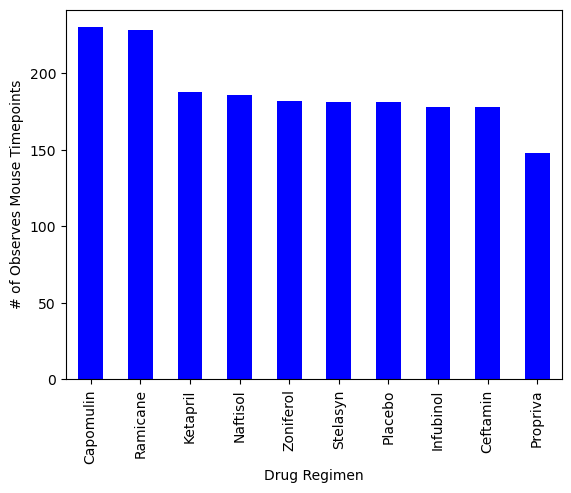

In [24]:
mice_time_perdrug.plot(kind="bar", color="blue", xlabel = "Drug Regimen", ylabel ="# of Observes Mouse Timepoints")

plt.show()

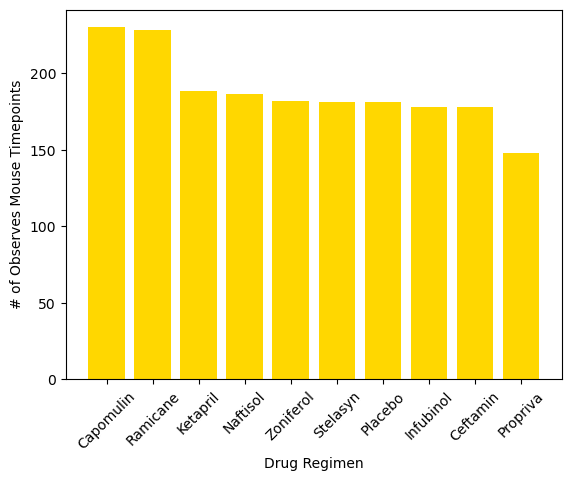

In [25]:
drug = mice_time_perdrug.index.values
mice = mice_time_perdrug.values

plt.bar(drug, mice, color="gold", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observes Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()



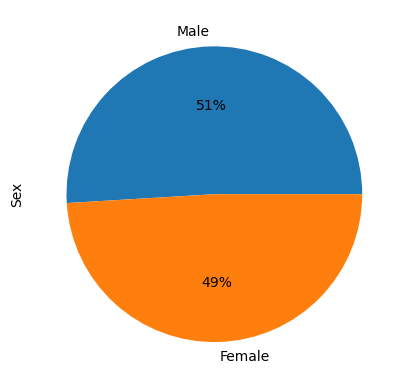

In [26]:
male_v_female = clean_study["Sex"].value_counts()
Sex = ["Male", "Female"]
male_v_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

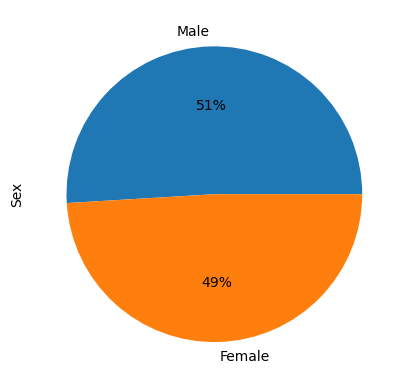

In [27]:
sex_label = male_v_female.index.values
count_value = male_v_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

In [28]:
final_tumor_volume = clean_study.loc[(clean_study["Drug Regimen"] == "Capomulin") | (clean_study["Drug Regimen"] == "Ramicane") |
                                        (clean_study["Drug Regimen"] == "Infubinol") |(clean_study["Drug Regimen"] == "Ceftamin") ]


In [29]:
greatest_time = clean_study.groupby(["Mouse ID"])["Timepoint"].max()
greatest_time = greatest_time.reset_index()

In [30]:
new_merged_data = greatest_time.merge(merged_study, on=["Mouse ID", "Timepoint"], how="left")


In [31]:
new_merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [32]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

for drug in treatments:
    total_tumor_vol = new_merged_data.loc[new_merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    tumor_vol.append(total_tumor_vol)

    quartiles = total_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = total_tumor_vol.loc[(total_tumor_vol < lower_bound) | (total_tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")
    

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


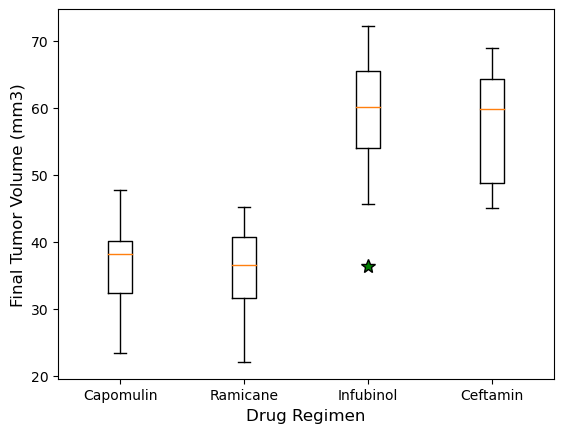

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(tumor_vol, labels=treatments, widths = 0.2,vert=True,flierprops={'markerfacecolor': 'g', 'marker': '*','markersize': 10})

plt.show()

In [34]:
capomulin_data = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin",:]
capomulin = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
capomulin.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


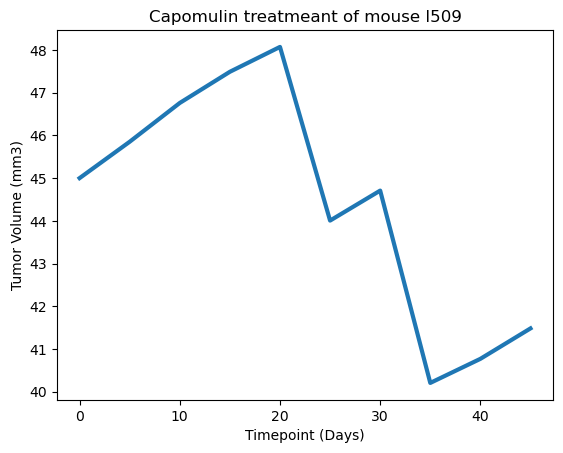

In [35]:
x_axis_cap_time = capomulin["Timepoint"]
tumor_volC = capomulin["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_cap_time, tumor_volC,linewidth=3, markersize=14)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\nicho\AppData\Local\Temp\ipykernel_7472\925814997.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capvol= capomulin_data.groupby(['Mouse ID']).mean()


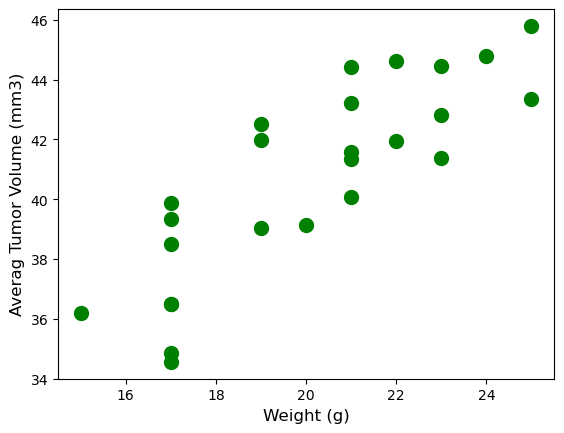

In [36]:
avg_capvol= capomulin_data.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots()
marker_size=10
plt.scatter(avg_capvol['Weight (g)'],avg_capvol['Tumor Volume (mm3)'],s=100, color="g")
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =12)


plt.show()

In [37]:
correlation_data = st.pearsonr(avg_capvol['Weight (g)'],avg_capvol['Tumor Volume (mm3)'])
round(correlation_data[0],2)

0.84

In [38]:
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_data[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The correlation between mouse weight and the average tumor volume is 0.84


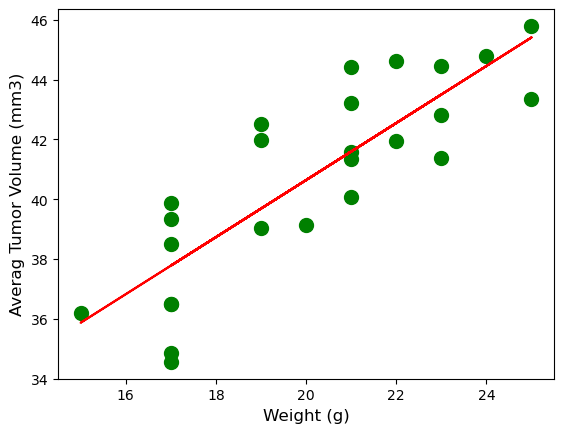

In [60]:
regression = avg_capvol["Weight (g)"]* slope + intercept

line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capvol['Weight (g)'],avg_capvol['Tumor Volume (mm3)'],s=100, color="g")
plt.plot(avg_capvol["Weight (g)"], regression, color='red')
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =12)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_data[0],2)}")
plt.show()
